<a href="https://colab.research.google.com/github/ncminhbka/ML-Projects/blob/main/Encoder_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/congnghia0609/ntc-scv.git

Cloning into 'ntc-scv'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 39 (delta 0), reused 4 (delta 0), pack-reused 35 (from 1)
Receiving objects: 100% (39/39), 186.94 MiB | 12.48 MiB/s, done.
Resolving deltas: 100% (9/9), done.
Updating files: 100% (11/11), done.


In [2]:
!unzip ./ntc-scv/data/data_test.zip -d ./data
!unzip ./ntc-scv/data/data_train.zip -d ./data

Streaming output truncated to the last 5000 lines.
  inflating: ./data/data_train/train/pos/31228.txt  
  inflating: ./data/data_train/train/pos/3123.txt  
  inflating: ./data/data_train/train/pos/31232.txt  
  inflating: ./data/data_train/train/pos/31233.txt  
  inflating: ./data/data_train/train/pos/31234.txt  
  inflating: ./data/data_train/train/pos/31236.txt  
  inflating: ./data/data_train/train/pos/31238.txt  
  inflating: ./data/data_train/train/pos/31240.txt  
  inflating: ./data/data_train/train/pos/31242.txt  
  inflating: ./data/data_train/train/pos/31247.txt  
  inflating: ./data/data_train/train/pos/31250.txt  
  inflating: ./data/data_train/train/pos/31251.txt  
  inflating: ./data/data_train/train/pos/31252.txt  
  inflating: ./data/data_train/train/pos/31257.txt  
  inflating: ./data/data_train/train/pos/31260.txt  
  inflating: ./data/data_train/train/pos/31261.txt  
  inflating: ./data/data_train/train/pos/31262.txt  
  inflating: ./data/data_train/train/pos/31273.tx

NCT_SV là dataset nhận xét nhà hàng, binary classification negative or positive, cách tổ chức thư mục cũng khá hay, cùng xem xử lý thế nào

In [3]:
#ĐỌC DL
import os
import pandas as pd

folder_path = 'data/data_test/test/neg'
os.listdir(folder_path) #hàm list mọi thứ (file, folder) trong folder

folder_path = 'data/data_test/test/'
os.listdir(folder_path)

def load_data_from_path(folder_path):
    data = []
    for label_name in os.listdir(folder_path):
        full_path = os.path.join(folder_path, label_name)
        for file_name in os.listdir(full_path):
            file_path = os.path.join(full_path, file_name)
            with open(file_path, 'r', encoding='utf-8') as f:
                content = f.read().strip()
            label = 1 if label_name == "pos" else 0
            dt = {
                'content': content,
                'label': label
            }
            data.append(dt)

    return pd.DataFrame(data)


pandas.DataFrame có thể chuyển trực tiếp từ một dict (từ điển) sang dạng bảng (table).
Đây chính là cách phổ biến nhất để tạo DataFrame trong Python.

In [4]:
test_df = load_data_from_path('data/data_test/test')
train_df = load_data_from_path('data/data_train/train')
val_df = load_data_from_path('data/data_train/test')

In [5]:
train_df['label'].value_counts(normalize=True)


,proportion
label,
0,0.5
1,0.5


Nhìn qua ta thấy dataset có chưa icon, teencode, ký tư đặc biệt, cùng xem xử thế nào

loc locate row lấy 1 ô theo tên hàng và tên cột

iloc lấy ô theo chỉ số hàng và cột

In [6]:
train_df.loc[0, 'content']

'Mình thấy quảng_cáo trên foody nên ghé thử . Mình chọn nướng ngói để ngồi ở ngoài nhưng lại hết ngói nên nướng vỉ . Mình vào gọi món mà 30p sau vẫn chưa hề đem nước hay thức_ăn ra . Gọi cơm_chiên hải_sản nhưng đem cơm_chiên dương châu lên và không giải_thích lý_do tại_sao cho_đến khi tính tiền mình hỏi thì mới bảo là hết hải_sản rồi nên làm dương châu thôi . Mang lên thiếu nước_chấm , thiếu dĩa , đũa , cũng không có khăn giấy mà mình phải gọi hoài 3-4 lần mới đem lên . Đem đồ_ăn lẩu lên để mình ngồi chờ nhắc hoài mà nửa tiếng sau mới bưng nước lẩu tới , lúc đó bếp than đã ỉu , cháy hết_nổi rồi . Vậy_là phải ngồi chờ đổi bếp than . Chủ quán và nhân_viên đều giải_thích là do quán đông quá thì mình có_thể thông_cảm , nhưng_mà cứ phải để khách_hàng chờ nhiều lần như_vậy thì rất bực_mình .\nQuán rất đông vì_vậy nên đặt bàn trước , nếu đi xe honda thì để xe dọc trước nhà người khác . Đối_diện đó là tiệm cafe Sense .\nVề món ăn thì khá ổn . Bò cuộn phô_mai thì chừng 5 cuộn , bò Mỹ ướp sa tế 

In [7]:
train_df.iloc[0, 0]

'Mình thấy quảng_cáo trên foody nên ghé thử . Mình chọn nướng ngói để ngồi ở ngoài nhưng lại hết ngói nên nướng vỉ . Mình vào gọi món mà 30p sau vẫn chưa hề đem nước hay thức_ăn ra . Gọi cơm_chiên hải_sản nhưng đem cơm_chiên dương châu lên và không giải_thích lý_do tại_sao cho_đến khi tính tiền mình hỏi thì mới bảo là hết hải_sản rồi nên làm dương châu thôi . Mang lên thiếu nước_chấm , thiếu dĩa , đũa , cũng không có khăn giấy mà mình phải gọi hoài 3-4 lần mới đem lên . Đem đồ_ăn lẩu lên để mình ngồi chờ nhắc hoài mà nửa tiếng sau mới bưng nước lẩu tới , lúc đó bếp than đã ỉu , cháy hết_nổi rồi . Vậy_là phải ngồi chờ đổi bếp than . Chủ quán và nhân_viên đều giải_thích là do quán đông quá thì mình có_thể thông_cảm , nhưng_mà cứ phải để khách_hàng chờ nhiều lần như_vậy thì rất bực_mình .\nQuán rất đông vì_vậy nên đặt bàn trước , nếu đi xe honda thì để xe dọc trước nhà người khác . Đối_diện đó là tiệm cafe Sense .\nVề món ăn thì khá ổn . Bò cuộn phô_mai thì chừng 5 cuộn , bò Mỹ ướp sa tế 

In [8]:
train_df.iloc[100, 0]

'Thực_sự là ngay từ đầu mình phải khuyên luôn mọi ngừoi là không nên đến đây . Giá buffet 269k/suất và không phụ_thu cuối tuần cộng thêm hình_ảnh quảng_cáo tuyệt_vời thì đúng là ai cũng muốn đến . Mình có đặt bàn trước nhưng khi đến nhân_viên còn hơi lúng_túng không chắc chỗ ngồi . Mới nhìn thì không_gian quán khá sang_trọng , lịch_sự nhưng hơi bé và rất nóng , điều_hoà cộng thêm vài cái quạt mà vẫn khiến mọi ngừoi toát mồ_hôi . Nhưng những thứ đó có_thể bỏ_qua nếu được ăn ngon . Đằng này dãy đồ_ăn ngắn cũn , ít món , không có gì đặc_sắc . Nhà_hàng có bê ra một_số đồ nướng gọi_là tặng kèm nhưng đấy cũng chính là mấy món trong menu mà bạn muốn ăn thì_phải tìm và gọi thì bếp mới làm rồi mang ra . Thức_ăn cũng tạm nhưng mấy món như salad hay rau thì_có dấu_hiệu bị ôi của ngô hay cái gì đấy , hơi sợ . Đồ bày sẵn mà hết thì bổ_sung khá chậm dù đã có ngừoi đứng quan_sát và gọi cho bếp . Nhân_viên nhiệt_tình nhưng quá thiếu chuyên_nghiệp , khách ngồi ăn mà đứng ngay sau bàn_luận , mấy lỗi tha

re là một thư viện hay trong python

In [9]:
#làm sạch
import re
import string

def preprocess_text(text):
    # remove URLs https://www.
    url_pattern = re.compile(r'https?://\s+\wwww\.\s+')
    text = url_pattern.sub(r" ", text)

    # remove HTML Tags: <>
    html_pattern = re.compile(r'<[^<>]+>')
    text = html_pattern.sub(" ", text)

    # remove puncs and digits
    replace_chars = list(string.punctuation + string.digits)
    for char in replace_chars:
        text = text.replace(char, " ")

    # remove emoji
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r" ", text)

    # normalize whitespace
    text = " ".join(text.split())

    # lowercasing
    text = text.lower()
    return text

In [10]:
train_df['content'] = train_df['content'].apply(preprocess_text)
test_df['content'] = test_df['content'].apply(preprocess_text)
val_df['content'] = val_df['content'].apply(preprocess_text)

In [11]:
train_df.iloc[29998, 0]

'đi ăn bánh của quán bằng voucher miễn phí rất ưng dù ăn miễn phí nhưng cách phục vụ khá ổn không khó chịu như nhiều chỗ bánh ăn khá vừa miệng của mình không gian cũng lãng mạn rất hợp cho các đôi hẹn hò hihi điểm cộng nữa là có anh phục vụ đẹp trai ạ hihi rất ưng quán'

XÂY VOCAB

In [12]:
def tokenizer(sentence):
    return sentence.split()

In [13]:
from collections import Counter

def build_vocab_from_iterator(sentences, tokenizer, max_tokens=10000, specials=["<pad>", "<unk>"]):
    counter = Counter() #khơi tạo bộ đếm
    for sent in sentences:
        counter.update(tokenizer(sent)) #đếm

    # chọn max_tokens - len(specials) từ phổ biến nhất
    most_common = counter.most_common(max_tokens - len(specials)) #trừ đi special, lấy ra các từ xh nhiều nhất
    vocab_tokens = specials + [word for word, _ in most_common] #thêm vào tạo tokens
    vocab = {word: idx for idx, word in enumerate(vocab_tokens)} #thêm idx
    return vocab #là một dict, nhìn vào có thể đổi từ token sang idx


In [14]:
vocab = build_vocab_from_iterator(train_df['content'], tokenizer)
len(vocab)

10000

In [15]:
vocab["ngon"]

11

In [16]:
PAD_IDX = vocab['<pad>']

In [17]:
#chuyển hết dataset về numerical dù hơi tốn ram
def buid_dataset(sentences, tokenizer, vocab):
    encoded_sentences = []
    for sentence in sentences:
        encoded_sentence = [vocab[token] if token in vocab else vocab["<unk>"] for token in tokenizer(sentence)]
        encoded_sentences.append(encoded_sentence)
    return encoded_sentences


In [18]:
train_sentences = buid_dataset(train_df['content'], tokenizer, vocab)
test_sentences= buid_dataset(test_df['content'], tokenizer, vocab)
val_sentences = buid_dataset(val_df['content'], tokenizer, vocab)

In [19]:
train_labels = train_df['label'].to_list()
test_labels = test_df['label'].to_list()
val_labels = val_df['label'].to_list()

In [20]:
len(train_labels)

30000

In [21]:
from torch.utils.data import Dataset
class NTC_SV_Dataset(Dataset):
    def __init__(self, sentences, labels):
        self.sentences = sentences
        self.labels = labels
    def __len__(self):
        return len(self.sentences)
    def __getitem__(self, idx):
        return self.sentences[idx], self.labels[idx]

In [22]:
train_dataset = NTC_SV_Dataset(train_sentences, train_labels)
test_dataset = NTC_SV_Dataset(test_sentences, test_labels)
val_dataset = NTC_SV_Dataset(val_sentences, val_labels)

In [23]:
import torch

seq_length = 100 #maxlen

def collate_batch(batch):
    # create inputs, offsets, labels for batch
    sentences, labels = list(zip(*batch))
    encoded_sentences = [
        sentence+([0]* (seq_length-len(sentence))) if len(sentence) < seq_length else sentence[:seq_length]
        for sentence in sentences
    ]

    encoded_sentences = torch.tensor(encoded_sentences, dtype=torch.int64)
    labels = torch.tensor(labels)
    src_key_padding_mask = (encoded_sentences == PAD_IDX)
    return encoded_sentences, labels, src_key_padding_mask

In [24]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True, collate_fn=collate_batch)
test_dataloader = DataLoader(test_dataset, batch_size=128, shuffle=False, collate_fn=collate_batch)
val_dataloader = DataLoader(val_dataset, batch_size=128, shuffle=False, collate_fn=collate_batch)

In [25]:
next(iter(train_dataloader))

(tensor([[  7, 103, 256,  ...,   0,   0,   0],
         [894,  75, 267,  ...,   0,   0,   0],
         [ 39, 115,   5,  ...,   0,   0,   0],
         ...,
         [ 32,  89, 302,  ...,   0,   0,   0],
         [  3,  23, 119,  ...,   0,   0,   0],
         [161,  11,  49,  ...,   0,   0,   0]]),
 tensor([1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
         1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
         0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
         0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
         0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
         0, 1, 1, 1, 0, 0, 0, 0]),
 tensor([[False, False, False,  ...,  True,  True,  True],
         [False, False, False,  ...,  True,  True,  True],
         [False, False, False,  ...,  True,  True,  True],
         ...,
         [False, False, False,  ...,  True,  True,  True],
         [Fa

MODEL

In [26]:
#Token & pos embedding
import torch.nn as nn

class TokenAndPositionalEmbedding(nn.Module):
    def __init__(self, vocab_size, embedding_dim, max_len):
        super(TokenAndPositionalEmbedding, self).__init__()
        self.token_embedding = nn.Embedding(vocab_size, embedding_dim)
        self.positional_embedding = nn.Embedding(max_len, embedding_dim)
    def forward(self, x):
        bs, max_len = x.shape
        positions = torch.arange(0, max_len).expand(bs, max_len).to(x.device)
        token_embeddings = self.token_embedding(x)
        positional_embeddings = self.positional_embedding(positions)
        return token_embeddings + positional_embeddings #(bs, max_len, embedding_dim)

In [27]:
vocab_size = len(vocab)
embedding_dim = 128
max_len = 100

In [28]:
tape = TokenAndPositionalEmbedding(vocab_size, embedding_dim, max_len)
out = tape(next(iter(train_dataloader))[0])
out.shape

torch.Size([128, 100, 128])

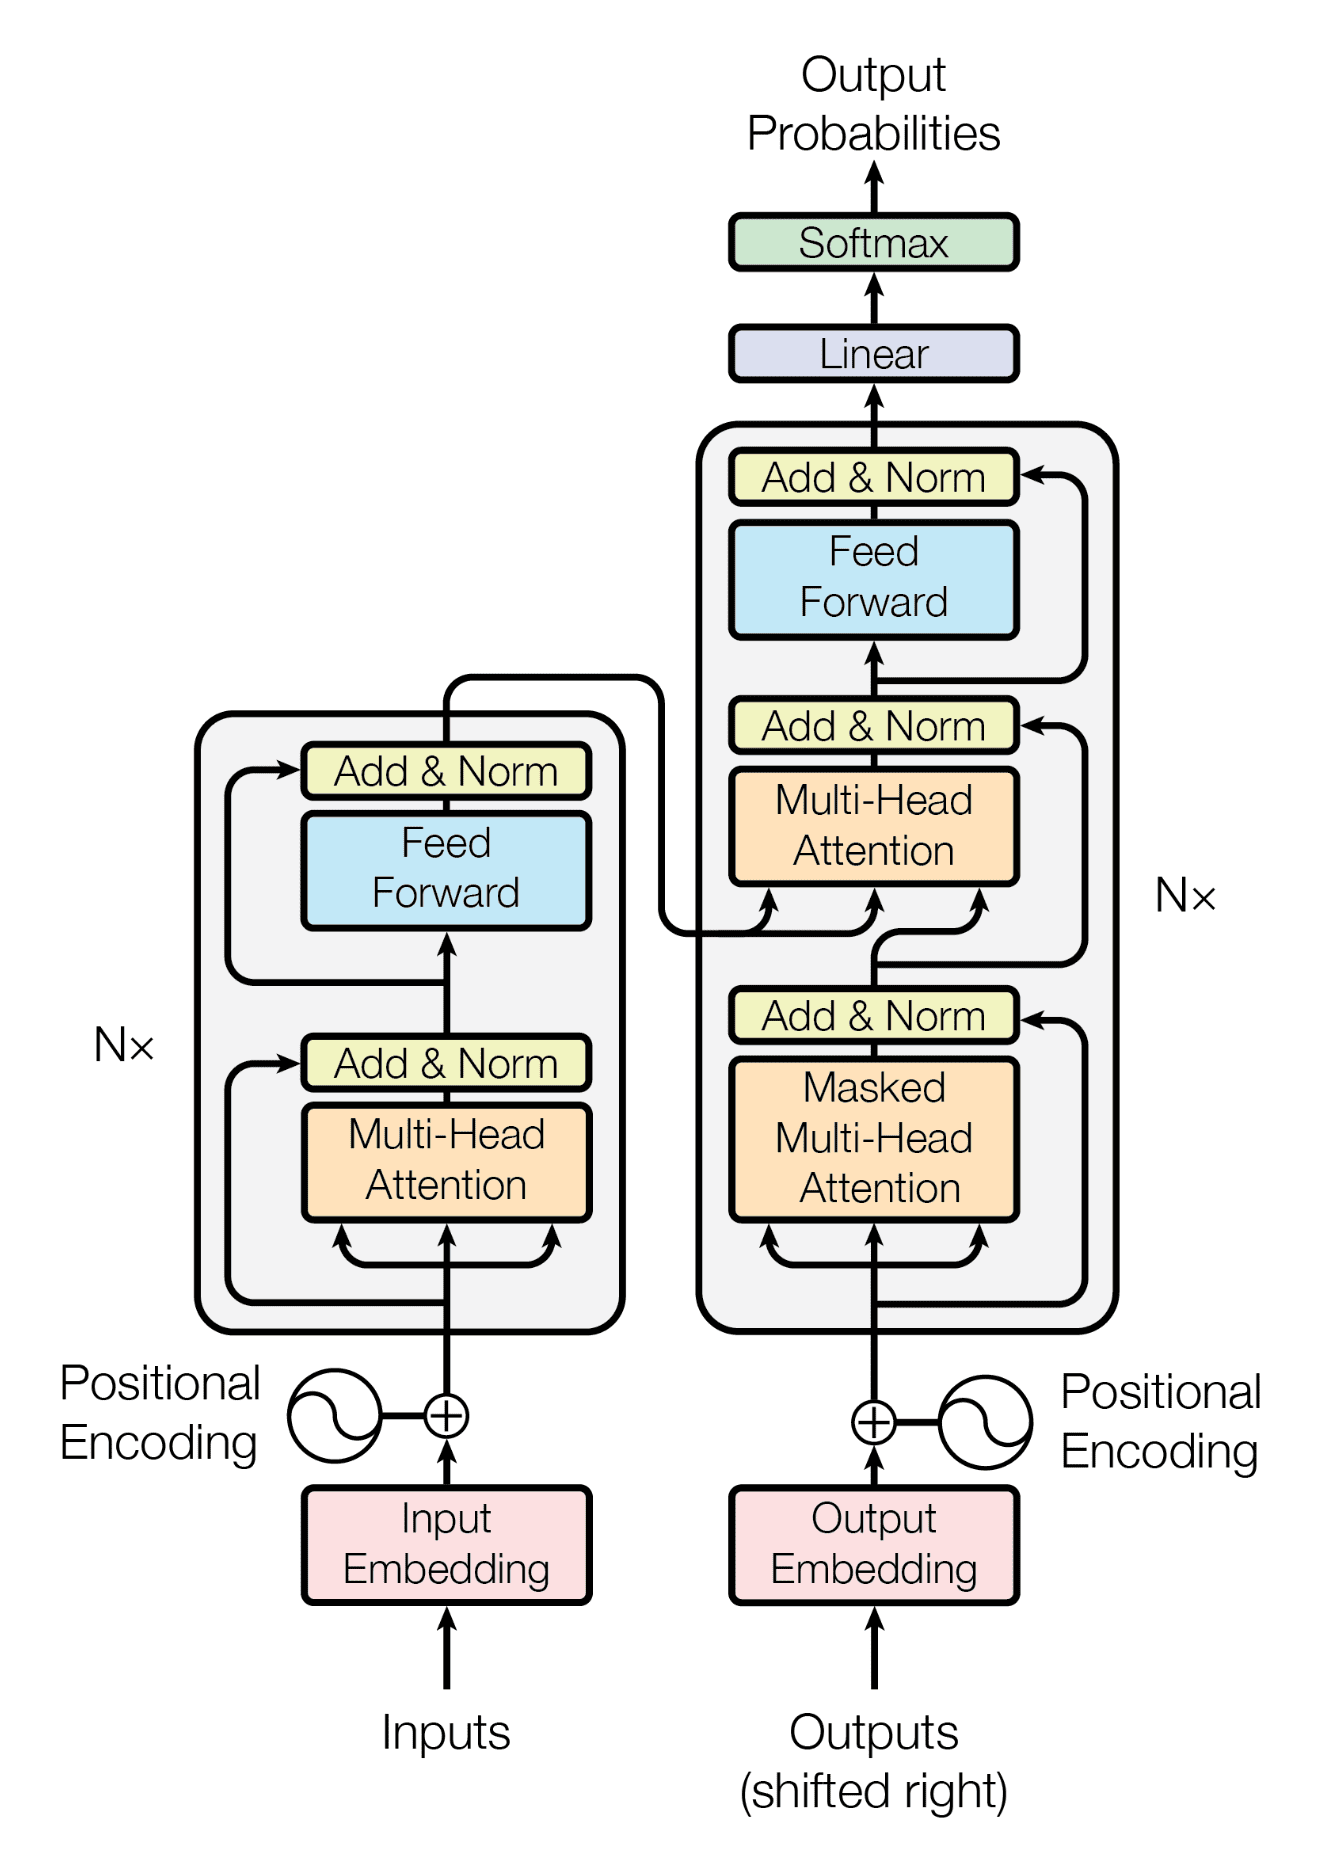

In [29]:
class TransformerEncoderBlock(nn.Module):
    def __init__(self, embedding_dim, num_heads, ff_dim, dropout_rate=0.1):
        super(TransformerEncoderBlock, self).__init__()
        self.attn = nn.MultiheadAttention(embedding_dim, num_heads, batch_first = True)
        self.ffn = nn.Sequential(
            nn.Linear(embedding_dim, ff_dim),
            nn.ReLU(),
            nn.Linear(ff_dim, embedding_dim)
        )
        self.layernorm_1 = nn.LayerNorm(normalized_shape=embedding_dim, eps=1e-6)
        self.layernorm_2 = nn.LayerNorm(normalized_shape=embedding_dim, eps=1e-6)
        self.dropout_1 = nn.Dropout(p=dropout_rate)
        self.dropout_2 = nn.Dropout(p=dropout_rate)
    def forward(self, q, k, v, src_key_padding_mask):
        attn_output, _ = self.attn(q, k, v, key_padding_mask =  src_key_padding_mask)
        attn_output = self.dropout_1(attn_output)
        out1 = self.layernorm_1(q + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout_2(ffn_output)
        out2 = self.layernorm_2(out1 + ffn_output)
        return out2

In [30]:
class TransformerEncoderModel(nn.Module):
    def __init__(self, num_layers, embedding_dim, num_heads, ff_dim, vocab_size, max_len, dropout_rate=0.1):
        super(TransformerEncoderModel, self).__init__()
        self.tape = TokenAndPositionalEmbedding(vocab_size, embedding_dim, max_len)
        self.encoder_blocks = nn.ModuleList([
            TransformerEncoderBlock(embedding_dim, num_heads, ff_dim, dropout_rate) for _ in range(num_layers)
        ])
        self.fc1 = nn.Linear(embedding_dim, 32)
        self.fc2 = nn.Linear(32, 2)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_rate)
    def forward(self, x, src_key_padding_mask):
        x = self.tape(x)
        for block in self.encoder_blocks:
            x = block(x, x, x, src_key_padding_mask)
        mask = ~src_key_padding_mask  # đảo mask để PAD=False
        x = (x * mask.unsqueeze(-1)).sum(dim=1) / mask.sum(dim=1, keepdim=True)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x


In [31]:
def evaluate(dataloader, criterion, model, device='cpu'):
    model.eval()
    losses = []
    total = 0
    correct = 0
    with torch.no_grad():
        for inputs, labels, masks in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            masks = masks.to(device)
            output = model(inputs, masks)
            loss = criterion(output, labels)
            losses.append(loss.item())
            correct += (output.argmax(1) == labels).sum().item()
            total += labels.size(0)
    loss = sum(losses)/len(losses)
    acc = correct/total
    return loss, acc

In [32]:
def train(num_epochs, model, train_loader, val_loader, criterion, optimizer, device='cpu'):

    train_accs, train_losses = [], []
    eval_accs, eval_losses = [], []
    for epoch in range(num_epochs):
        model.train()
        for inputs, labels, masks in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            masks = masks.to(device)
            optimizer.zero_grad()
            output = model(inputs, masks)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
        if(epoch % 1 == 0):
            train_loss, train_acc = evaluate(train_loader, criterion, model, device)
            eval_loss, eval_acc = evaluate(val_loader, criterion, model, device)
            train_accs.append(train_acc)
            train_losses.append(train_loss)
            eval_accs.append(eval_acc)
            eval_losses.append(eval_loss)
            print(f'Epoch: {epoch}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Eval Loss: {eval_loss:.4f}, Eval Acc: {eval_acc:.4f}')
    return train_accs, train_losses, eval_accs, eval_losses

In [33]:
num_epochs = 50
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vocab_size = len(vocab)
embedding_dim = 128
num_heads = 4
ff_dim = 256
max_len = 100
num_layers = 1
dropout_rate = 0.1
model = TransformerEncoderModel(num_layers, embedding_dim, num_heads, ff_dim, vocab_size, max_len, dropout_rate).to(device)

In [34]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
train_accs, train_losses, eval_accs, eval_losses = train(num_epochs, model, train_dataloader, val_dataloader, criterion, optimizer, device)

Epoch: 0, Train Loss: 0.3428, Train Acc: 0.8563, Eval Loss: 0.3919, Eval Acc: 0.8313
Epoch: 1, Train Loss: 0.2684, Train Acc: 0.8927, Eval Loss: 0.3679, Eval Acc: 0.8489
Epoch: 2, Train Loss: 0.2333, Train Acc: 0.9103, Eval Loss: 0.3717, Eval Acc: 0.8450
Epoch: 3, Train Loss: 0.1765, Train Acc: 0.9391, Eval Loss: 0.3949, Eval Acc: 0.8487
Epoch: 4, Train Loss: 0.1380, Train Acc: 0.9546, Eval Loss: 0.4765, Eval Acc: 0.8456
Epoch: 5, Train Loss: 0.1175, Train Acc: 0.9645, Eval Loss: 0.4550, Eval Acc: 0.8413
Epoch: 6, Train Loss: 0.0958, Train Acc: 0.9698, Eval Loss: 0.5185, Eval Acc: 0.8401
Epoch: 7, Train Loss: 0.0874, Train Acc: 0.9713, Eval Loss: 0.5574, Eval Acc: 0.8375
Epoch: 8, Train Loss: 0.0664, Train Acc: 0.9786, Eval Loss: 0.6567, Eval Acc: 0.8361
Epoch: 9, Train Loss: 0.0556, Train Acc: 0.9802, Eval Loss: 0.7387, Eval Acc: 0.8359
Epoch: 10, Train Loss: 0.0408, Train Acc: 0.9863, Eval Loss: 0.8485, Eval Acc: 0.8375
Epoch: 11, Train Loss: 0.0375, Train Acc: 0.9873, Eval Loss: 0.8

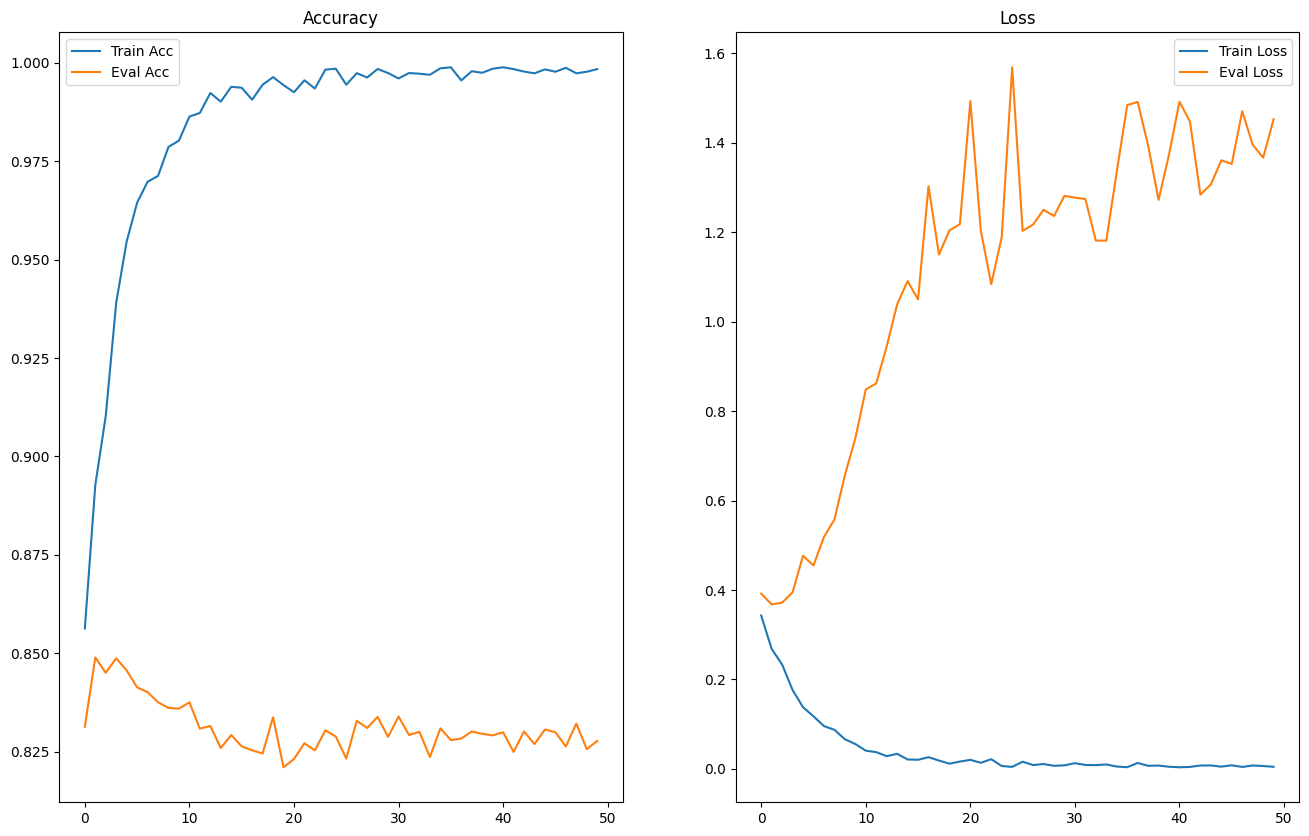

In [35]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize = (16, 10))
ax[0].plot(train_accs, label = 'Train Acc')
ax[0].plot(eval_accs, label = 'Eval Acc')
ax[0].legend()
ax[0].set_title('Accuracy')
ax[1].plot(train_losses, label = 'Train Loss')
ax[1].plot(eval_losses, label = 'Eval Loss')
ax[1].legend()
ax[1].set_title('Loss')
plt.show()

In [36]:
test_loss, test_acc = evaluate(test_dataloader, criterion, model, device)
print(f'Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}')

Test Loss: 1.3970, Test Acc: 0.8361
